In [8]:
import pickle
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import utils 
%matplotlib inline



name = 'all_importances_SI_'
meta = 'run_new'
seed = '100'  
#note that, depending on the seed, the importances get saved (or not)
with open(name+meta+seed+'.pickle', 'rb') as f:
    D = pickle.load(f)

In [12]:
a = D

if 'SI' in name:
    a['RSM'] = np.sqrt(a['expSM']) #RSM root-square-mean
    a['SOS'] = np.sqrt(a['expSM']) #RSM root-square-mean
    a['SI-N'] = np.maximum(a['SI'],0)/(a['lengths']**2+0.1)
    a['SIB-N'] = np.maximum(a['SIB'],0)/(a['lengths']**2 + 0.1)
    a['SIU-N'] = np.maximum(a['SIU'],0)/(a['lengths']**2 + 0.1)

if 'MAS' in name:
    a = D
    for val in a.values():
        val /= 1000 #normalise
    a['rEWC'] = np.sqrt(a['EWC'])

    
label_dict = {}
for kk in a.keys():
    label_dict[kk] = kk
for kk in label_dict.keys():
    if '-N' in kk:
        label_dict[kk] = label_dict[kk][:-2]
        label_dict['RSM']  = r'SOS ($\sqrt{v_t}$)'
label_dict['rEWC']  = r'$\sqrt{Fisher}$'
label_dict['AF']  = r'AF  =  $\mathbb{E}[|g|]$'

Pearson correlation on task 1 between SI and SOS is: 0.99 0.0


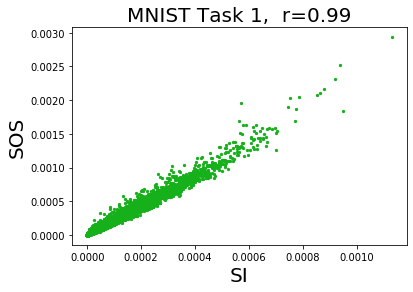

In [15]:
fs = 20 #fontsize for legend, xy-label
save_fig = False
subsample_weights = True

#make sure the first cell loads the right importances (SI or MAS related)
#if you want to plot SOS, use x='RSM' (or y='RSM')
#if you want to plot SI, SIU, SIB after the rescaling (see paper) use SI-N, SIB-N, SIU-N
x = 'SI'
y = 'SOS'


for task in [0]:
#for task in range(10):
     #chose a random sample of weights to make plotting faster. If False, all weights are plotted
    n_subsample = int(1e5) #chose number of randomly sampled weights

    # plot it
    x_data = a[x][task,:]
    y_data = (a[y][task,:])
    rho, pp = scipy.stats.pearsonr(x_data, y_data)
    rho = int(rho*100)/100
    print('Pearson correlation on task', task+1, 'between',x,'and',y, 'is:', rho, pp)

    if subsample_weights:
        permuted = np.random.permutation(len(x_data))
        displayed = permuted[:n_subsample]
        x_data = x_data[displayed]
        y_data = y_data[displayed]
    eps = 1e-7
    fig, ax = plt.subplots(figsize=[6,4])
    #fig.tight_layout()
    ax.scatter(x_data, y_data, s=5,alpha=1,c='xkcd:green')
    ax.set_xlabel(label_dict[x], fontsize=fs)
    ax.set_ylabel(label_dict[y], fontsize=fs)
    ax.set_title('MNIST Task '+ str(task+1)+',  r='+str(rho), fontsize=fs)
    marg = 0.05
    ax.set_xlim([min(x_data)-marg*(max(x_data)-min(x_data)), max(x_data)+marg*(max(x_data)-min(x_data))])
    ax.set_ylim([min(y_data)-marg*(max(y_data)-min(y_data)), max(y_data)+marg*(max(y_data)-min(y_data))])
    #ax.set_xlim([0, 0.0003/eps])
    #ax.set_ylim([0, 0.1/eps])
   
    fig.show()
    if save_fig:
        path = os.path.expanduser('~/figures/')
        name = 'MNIST_scatter_'+str(task+1)+'_'+x+'_'+y+'.png'
        fig.savefig(path+name, bbox_inches='tight')
